### Values and Build Years of Buffalo Homes

In [1]:
import pandas as pd
import altair as alt
from histogram1d import histogram1d
import matplotlib.pyplot as plt


In [2]:
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
assessments = pd.read_csv('https://data.buffalony.gov/api/views/kckn-jafw/rows.csv?accessType=DOWNLOAD')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (22,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 3: Make a Histogram of 'TOTAL VALUES' or 'YEARS BUILT' of single family homes. 

#### 3.1 Subset the data using the columns listed. Explore the data and examine na's.

In [4]:
assess = assessments[['STREET','LATITUDE','LONGITUDE','PROPERTY CLASS DESCRIPTION','TOTAL VALUE','YEAR BUILT']]


#### 3.1 Subset to include only single family homes.

In [5]:
assess

,STREET,LATITUDE,LONGITUDE,PROPERTY CLASS DESCRIPTION,TOTAL VALUE,YEAR BUILT
0,AUBURN,NaN,NaN,RESIDENTIAL VACANT LAND,3000,NaN
1,LINWOOD AVE,NaN,NaN,GAS MEAS STATION,15000,NaN
2,BRUNSWICK,NaN,NaN,ONE FAMILY DWELLING,52100,1926.0
3,NORTHLAND,NaN,NaN,RESIDENTIAL VACANT LAND,100,NaN
4,FERRY WEST,NaN,NaN,TWO FAMILY DWELLING,291720,2016.0
5,BRECKENRIDGE,NaN,NaN,RESIDENTIAL VACANT LAND,900,NaN
6,JEFFERSON,NaN,NaN,TWO FAMILY DWELLING,5000,1935.0
7,GOULDING,NaN,NaN,RESIDENTIAL VACANT LAND,1050,NaN
8,FERRY EAST,NaN,NaN,DOWNTOWN ROW TYPE (DETACHED),1335000,NaN
9,LEXINGTON,NaN,NaN,TWO FAMILY DWELLING,80000,1967.0


In [6]:
# total values
assess_single = assess[assess['PROPERTY CLASS DESCRIPTION'] == 'ONE FAMILY DWELLING']
assess_single.head()

,STREET,LATITUDE,LONGITUDE,PROPERTY CLASS DESCRIPTION,TOTAL VALUE,YEAR BUILT
2,BRUNSWICK,NaN,NaN,ONE FAMILY DWELLING,52100,1926.0
14,RILEY,42.909501,-78.840814,ONE FAMILY DWELLING,25100,1900.0
18,MICHIGAN,NaN,NaN,ONE FAMILY DWELLING,46000,1995.0
20,OAKLAND,NaN,NaN,ONE FAMILY DWELLING,190000,1890.0
21,MICHIGAN,NaN,NaN,ONE FAMILY DWELLING,63000,2006.0


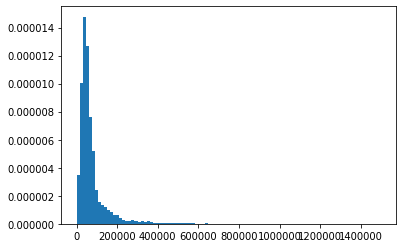

In [7]:
values = assess_single['TOTAL VALUE']
lefts, freqs = histogram1d(values, values.min(), values.max(), 100)
barw = lefts[1]-lefts[0]
plt.bar(lefts, freqs, barw, align='edge');

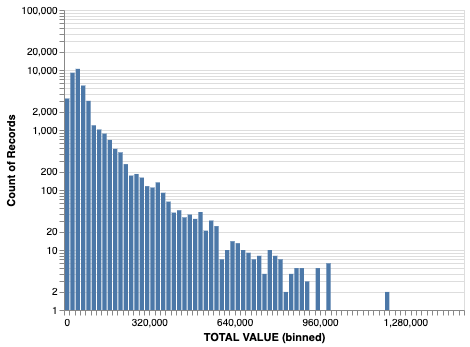

In [8]:
alt.Chart(assess_single).mark_bar().encode(
    x = alt.X('TOTAL VALUE', bin=alt.Bin(extent = [0,1500000], step=20000)),
    y = alt.Y('count()', scale = alt.Scale(type = 'log', base = 10) )
)

#### 3.2 Create Histogram, using bins. 

### 3.3 Here is a heatmap that combines both variables and their counts

In [9]:
ASSESS = alt.Chart(assess_single).mark_rect().encode(
    x = alt.X('YEAR BUILT',bin = alt.Bin(maxbins = 30)),
    y = alt.Y('TOTAL VALUE',bin = alt.Bin(maxbins = 30)),
    color = alt.Color('count()' , scale = alt.Scale(type = 'log', base = 10)),
    tooltip = ['count(YEAR BUILT):Q'],
    ).properties(width = 500, height = 500)


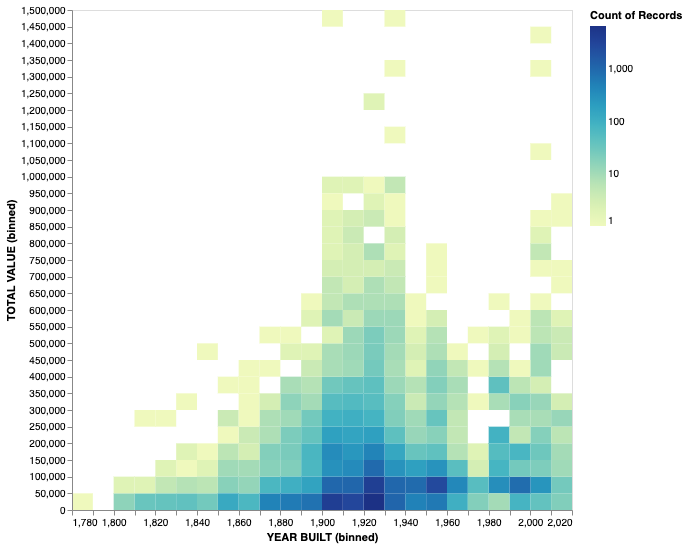

In [10]:
ASSESS

### 4: Map Homes of Interest

#### 4.1 Display a map of Buffalo

In [11]:
import json
import requests

In [12]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [30]:
url = 'https://data.buffalony.gov/api/geospatial/ts8p-7v76?method=export&format=GeoJSON'
data = requests.get(url)
map_json = data.text
#buf_map_data = json.loads(map_json)


In [14]:
BUFFALO = alt.Chart(alt.Data(values=map_json)).mark_geoshape(
        stroke='black',
        strokeWidth=1,clip = True
    ).encode(
    ).properties(
        width=600,
        height=600) 

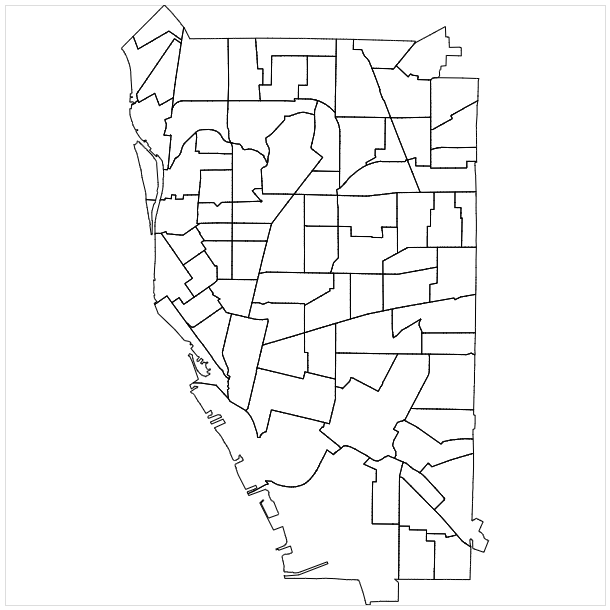

In [15]:
BUFFALO

#### 4.2 Pick an area of interest from the heatmap. Subset assess_single to represent this area. Make a scatter plot of the subsetted Dataframe using latitude and longitude.

In [45]:
myassess = assess_single[assess_single['TOTAL VALUE'] > 1000000]
myassess = myassess.dropna()
myassess.head(100)

,STREET,LATITUDE,LONGITUDE,PROPERTY CLASS DESCRIPTION,TOTAL VALUE,YEAR BUILT
22191,LAKEFRONT,42.883709,-78.884651,ONE FAMILY DWELLING,1322411,2009.0
22365,LAKEFRONT,42.883709,-78.884651,ONE FAMILY DWELLING,1069207,2009.0
73426,NOTTINGHAM,42.935456,-78.871699,ONE FAMILY DWELLING,1450000,1932.0
73798,MEADOW,42.938431,-78.865076,ONE FAMILY DWELLING,1400000,2007.0
73853,MIDDLESEX,42.939454,-78.864333,ONE FAMILY DWELLING,1200000,1925.0
73873,MIDDLESEX,42.938394,-78.863587,ONE FAMILY DWELLING,1100000,1930.0
75044,NOTTINGHAM,42.936050,-78.874156,ONE FAMILY DWELLING,1300000,1930.0
75093,SUMMIT,42.936570,-78.847758,ONE FAMILY DWELLING,1500000,1903.0
76938,LINCOLN,42.927517,-78.872905,ONE FAMILY DWELLING,1200000,1927.0


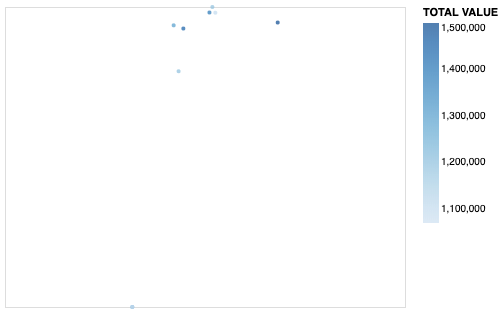

In [42]:
MYASSESS = alt.Chart(myassess).mark_circle(size=15).encode(
    longitude='LONGITUDE',
    latitude='LATITUDE',
    tooltip=['TOTAL VALUE', 'LONGITUDE', 'LATITUDE'],
    color='TOTAL VALUE')

MYASSESS

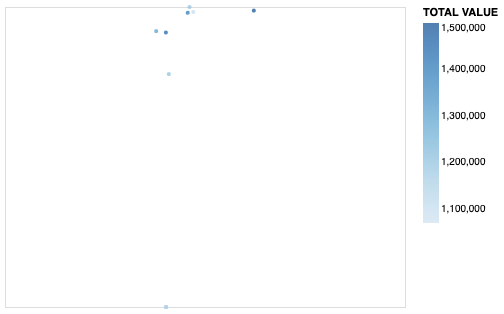

In [43]:
MYASSESS = alt.Chart(myassess).mark_circle(size=15).encode(
    longitude='LONGITUDE',
    latitude='LATITUDE',
    tooltip=['TOTAL VALUE', 'LONGITUDE', 'LATITUDE'],
    color='TOTAL VALUE').project('albersUsa')

MYASSESS

#### 4.3 Layer the scatter plot on the map of Buffalo.

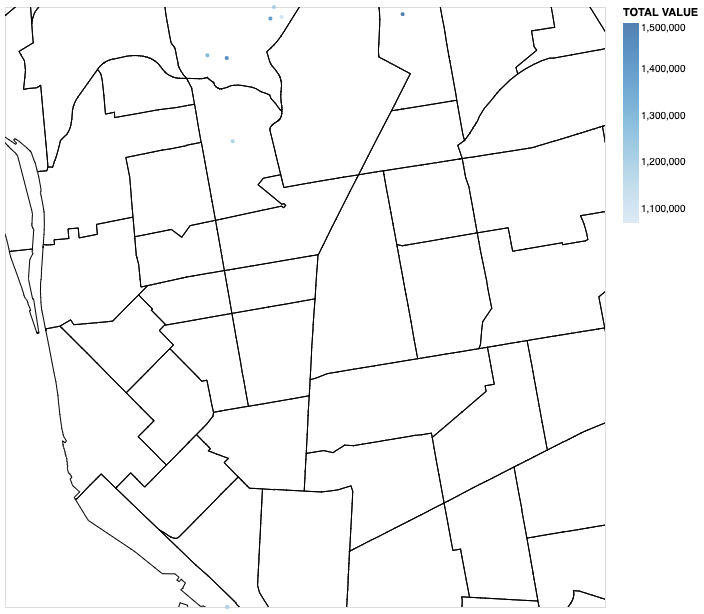

In [44]:
BUFFALO + MYASSESS





### 5: Selections in altair

In [19]:
assess_single = assess_single.dropna()
assess_single.head(3)

,STREET,LATITUDE,LONGITUDE,PROPERTY CLASS DESCRIPTION,TOTAL VALUE,YEAR BUILT
14,RILEY,42.909501,-78.840814,ONE FAMILY DWELLING,25100,1900.0
53,LOCUST,42.896382,-78.861544,ONE FAMILY DWELLING,19600,1900.0
112,FOLGER,42.847512,-78.827633,ONE FAMILY DWELLING,41000,1878.0


In [20]:

color_specs = alt.Color('count()' , scale = alt.Scale(type = 'log', base = 10))
sel = alt.selection(type = 'interval')
 
ASSESS = alt.Chart().mark_rect().encode(
    x = 'valuebins:O',
    y = 'yearbins:O',
    tooltip = ['count(YEAR BUILT):Q'], 
    color = alt.condition(sel, color_specs, alt.value('lightgray'))
).project(
    type = 'identity',reflectX = True
).properties(width = 400, height = 400
).add_selection(sel)

In [21]:
ASSESS_sel = alt.Chart().mark_circle(opacity = .4,size = 8).encode(
    longitude = 'LONGITUDE:Q',
    latitude = 'LATITUDE:Q',
    tooltip = ['STREET:N']).properties(
    width = 400, 
    height = 400).transform_filter(sel)

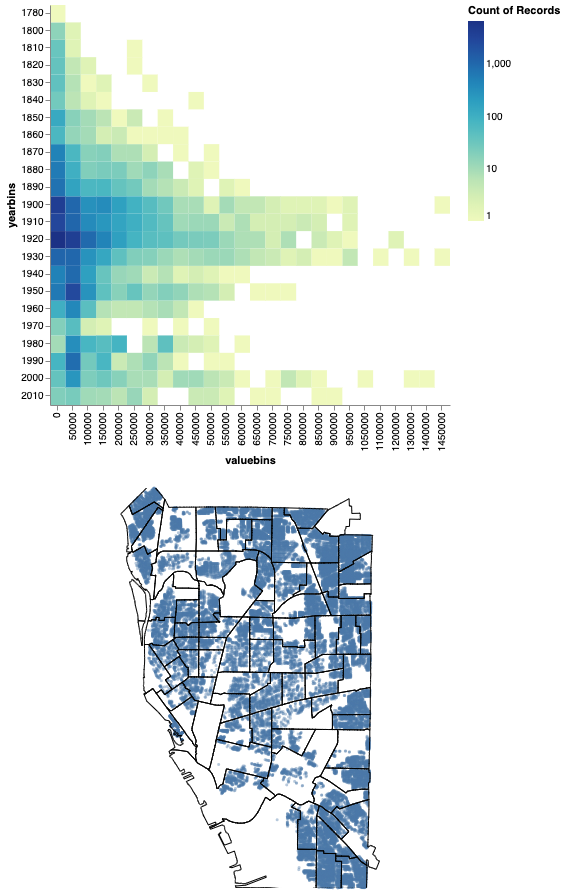

In [22]:
alt.vconcat(ASSESS, ASSESS_sel+ BUFFALO, data = assess_single).transform_bin(
    "yearbins",
    field="YEAR BUILT",
    bin=alt.Bin(maxbins=40)).transform_bin('valuebins',field = 'TOTAL VALUE',bin=alt.Bin(maxbins=40)).configure_view(
    strokeWidth=0)
  
